<h1 style='color: green; font-size: 36px; font-weight: bold;'>Modelo Preditivo de Regressão - Previsão do Preço de venda de Carros</h1>

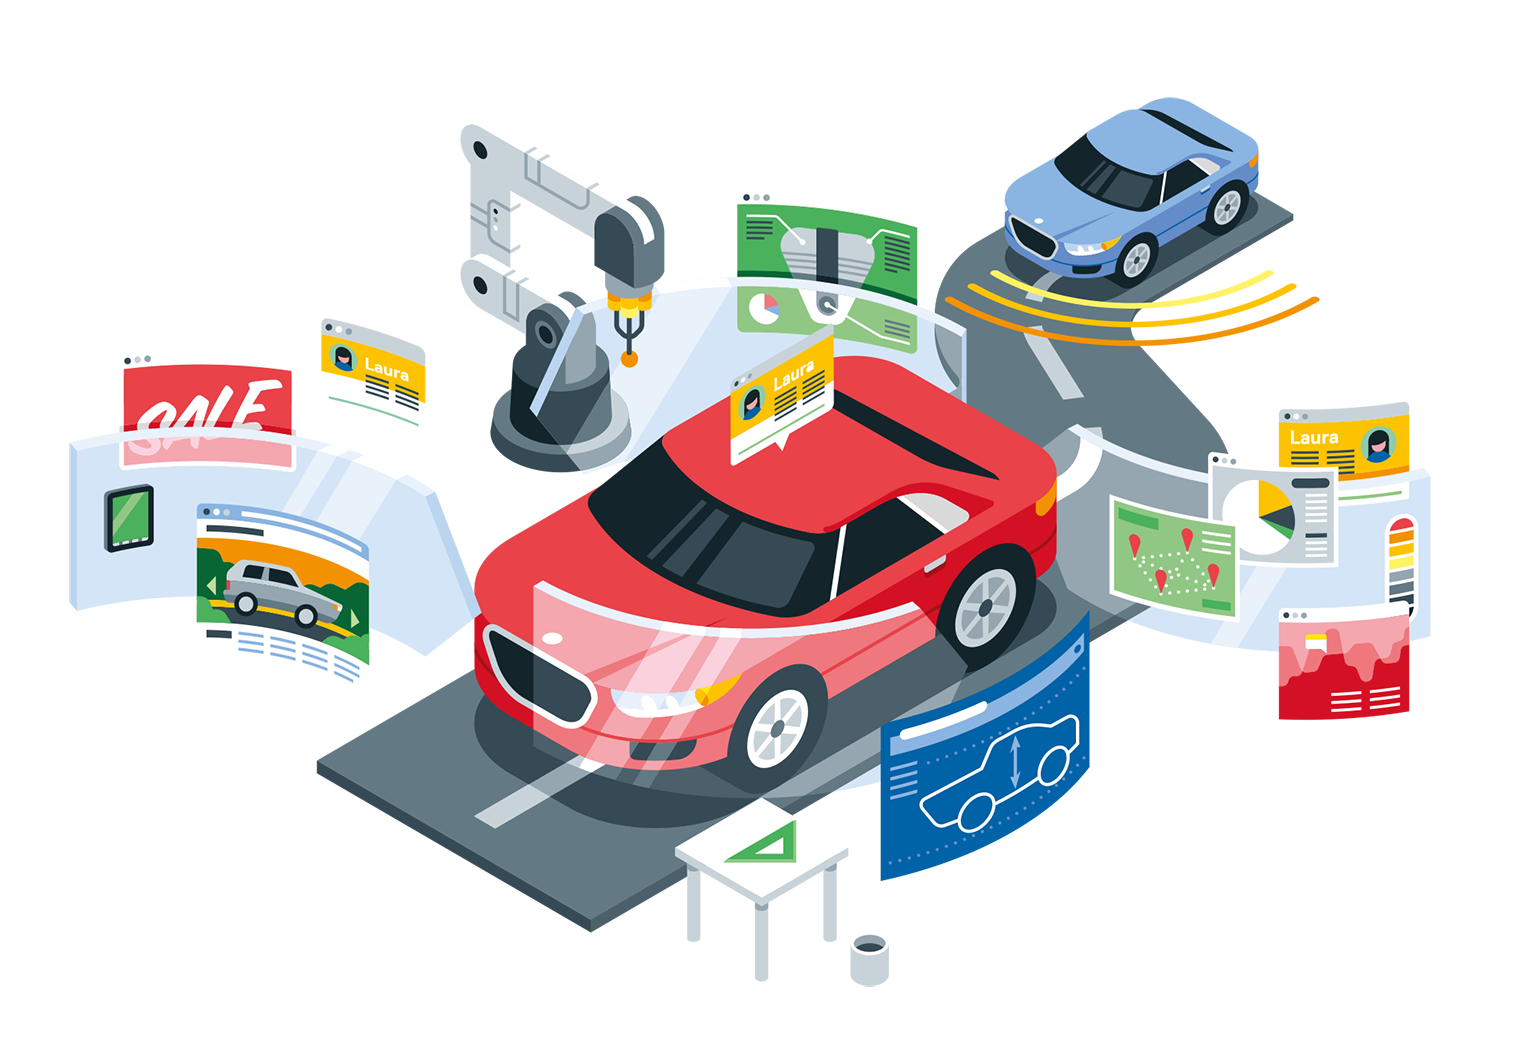

## Problema de Negócio:

👉 Com demandas crescentes e competições acirradas no mercado, uma loja fictícia do ramo de carros está buscando prever o preço dos carros para os próximos anos e o aumento de vendas

👉 Neste case irei abordar a construção de um modelo preditivo supervisionado com o intuito de prever o Aumento de Vendas e o preço dos carros dessa empresa fictícia baseado em suas informações de produtos

👉 Utilizarei os principais algoritmos de Machine Learning para a criação de modelos preditivos de regressão e testar a performance de cada um com intuito de apontar o mais preciso na previsão, buscando o aprimoramento de seus hiperparâmetros.

#### Sumário:

- 1) Importando as principais Bibliotecas 💻
- 2) Leitura do dataset 📂
- 3) Análises preliminares e tratamento dos dados 📃
- 4) Extração de Insights 💡
- 5) Preparando o dataset para o modelo 🔧
- 6) Análise de correlação 📈
- 7) Criação e avaliação dos modelos 🤖
- 8) Conclusão 🎉

## 1) Importando as principais Bibliotecas 💻

In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import emojis
import handcalcs.render
warnings.filterwarnings("ignore")
%matplotlib inline

## 2) Leitura do dataset 📂

O dataset possui 301 linhas e 9 colunas, sendo que 1 delas está relacionada com o preço da Venda (Selling_Price) da empresa. O foco do estudo será na previsão do preço do carro com base nos dados fornecidos pelas features.

O modelo deverá ser responsável por treinar estas informações e aprender uma boa maneira de prever o preço dos carros.

#### Features:

- Car_Name: Nome do modelo do carro
- Year: Ano de fabricação do carro
- Selling_Price: Preço de venda do carro
- Present_Price: Preço atual do carro
- Kms_Driven: Kilometragem atual do carro
- Fuel_Type: Tipo de combustível
- Seller_Type: Tipo de vendedor
- Owner: Quantidade de donos que o carro teve

In [415]:
# Setar a opção de visualização para todas as colunas
pd.set_option('display.max_columns', None)

In [416]:
df = pd.read_csv('C:/Users/lucas/Downloads/cardata.csv',sep=',', encoding='windows-1252')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 3) Análises preliminares e tratamento dos dados 📃

Para que o modelo performe muito bem é ideal que o dataset esteja limpo e puro, as vezes um dataset bem transformado já resolve qualquer problema de performance complexo que o modelo precisa passar para ser reajustado.

Para isso é ideal retirar valores duplicados ou nulos que possam atrapalhar a performance de precisão do modelo (veficar antes se é necessário simplesmente deletar os valores. Alguns casos é necessário mantê-los ou até mesmmo substituir por algum outro valor que sejá útil. Por exemplo: se tivessemos valores nulos de renda e é indispensável a participação deste dado no modelo, então seria interessante preenche-lo com a mediana dos valores).

* #### Tamanho do dataset:

In [417]:
linhas = df.shape[0]
colunas = df.shape[1]

print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 301 linhas e 9 colunas


* #### Dados Nulos:

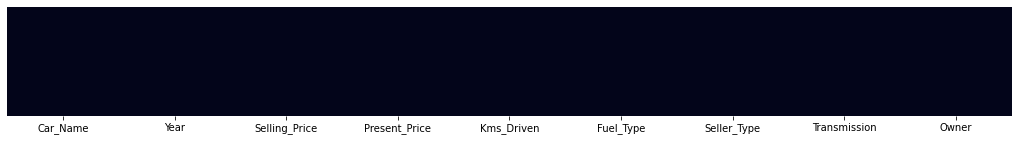

In [418]:
# Checando valores nulos
plt.figure(figsize=(18,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);

In [419]:
nulos = df.isnull().sum()

print('A base de dados tem %s dados nulos' %(nulos))

A base de dados tem Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64 dados nulos


* #### Tipo de dados:

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


* #### Dados duplicados:

In [421]:
duplicados = df.duplicated().sum()

print('A base de dados tem %s dados duplicados' %(duplicados))

A base de dados tem 2 dados duplicados


Quais linhas são duplicadas?

In [422]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


Analisando as linhas duplicadas:

In [423]:
df[(df['Car_Name'] == 'ertiga' ) & (df['Year'] == 2016)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0


In [424]:
df[(df['Car_Name'] == 'fortuner' ) & (df['Selling_Price'] == 23.00)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


Vemos que realmente estão duplicadas e podem ser deletadas

In [425]:
df = df.drop_duplicates()
df.shape

(299, 9)

In [426]:
df.reset_index(drop=True, inplace=True)

👉 Perfeito! Aparentemente o dataset está limpo e pronto para extração de alguns insights

* #### Criando a coluna de idade do carro

In [427]:
df['Car_Age'] = 2019 - df['Year']

In [428]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


## 4) Extração de Insights 💡

Com os insights é possível obter informações importantes do preço dos carros a partir das outras features presentes no dataset

## 4.1) Anual 📅

* #### Quantidade de Vendas por Ano

In [94]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6


In [95]:
#Criando um dataframe apenas com as vendas e os preços
df_bar = df[['Year','Selling_Price']]

#Agrupando os valores por região e fazendo a soma dos valores
df_bar = df_bar.groupby('Year').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 16 artists>

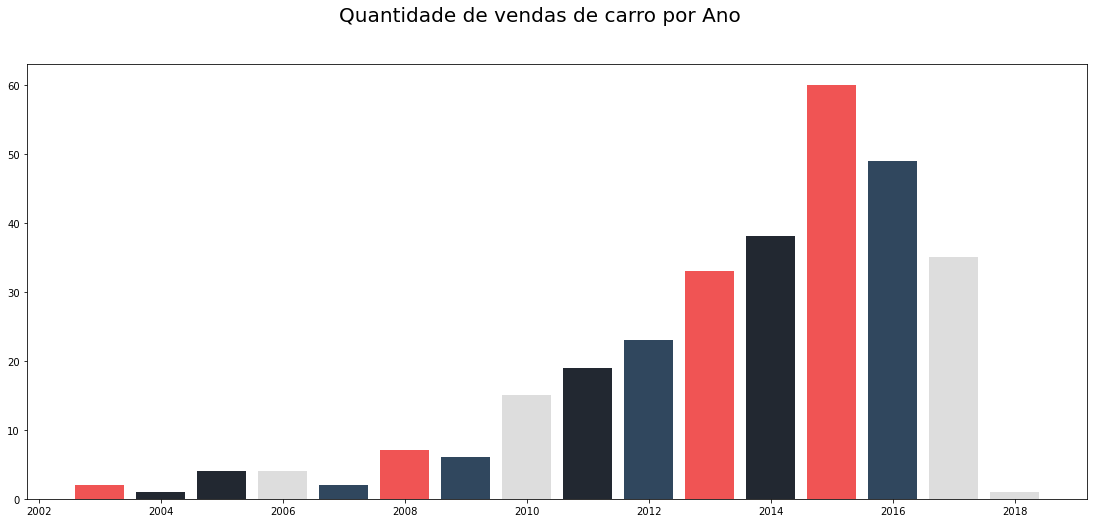

In [96]:
#Criando a figura para visualização
plt.figure(figsize=[19,8])

#Título
plt.suptitle("Quantidade de vendas de carro por Ano", size=20)

#Plotando o gráfico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

👉 O ano com maior número de vendas foi 2015. Também é possível analisar que a longo prazo as vendas foram aumentando consideravelmente. 

👉 Em 2016 e 2017 voltou a haver queda e 2018 como o ano não foi fechado os dados não podem ser utilizados para conclusão se a queda iria continuar ou não

* #### TOP 10 Carros mais vendidos

In [56]:
#Criando um dataframe apenas com as vendas e os carros
df_bar = df[['Car_Name','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Car_Name').count().sort_values(by='Selling_Price', ascending=False)

In [57]:
df_bar = df_bar.head(10)

<BarContainer object of 10 artists>

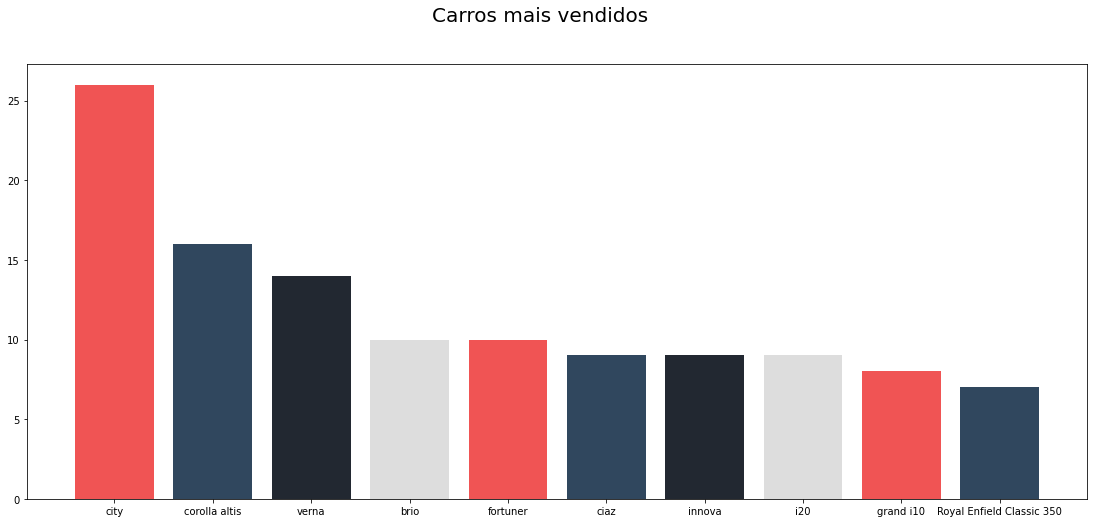

In [59]:
#Criando a figura para visualização
plt.figure(figsize=[19,8])

#Título
plt.suptitle("Carros mais vendidos", size=20)

#Plotando o gráfico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [66]:
df_bar.head(10)

,Selling_Price
Car_Name,
city,26
corolla altis,16
verna,14
brio,10
fortuner,10
ciaz,9
innova,9
i20,9
grand i10,8


👉 No geral o carro mais vendido foi o city, seguido do corolla altis, verna, brio e assim por diante.

👉 O city representa 22% das vendas totais dos TOP 10

👉 64% do total das vendas do TOP 10 pertence aos 5 primeiros carros

* #### TOP 10 Carros mais vendidos no ano de 2015

In [67]:
df_2015 = df.loc[df['Year']==2015]

In [68]:
#Criando um dataframe apenas com as vendas e os Carros
df_bar = df_2015[['Car_Name','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Car_Name').count().sort_values(by='Selling_Price', ascending=False)

In [69]:
df_bar = df_bar.head(10)

<BarContainer object of 10 artists>

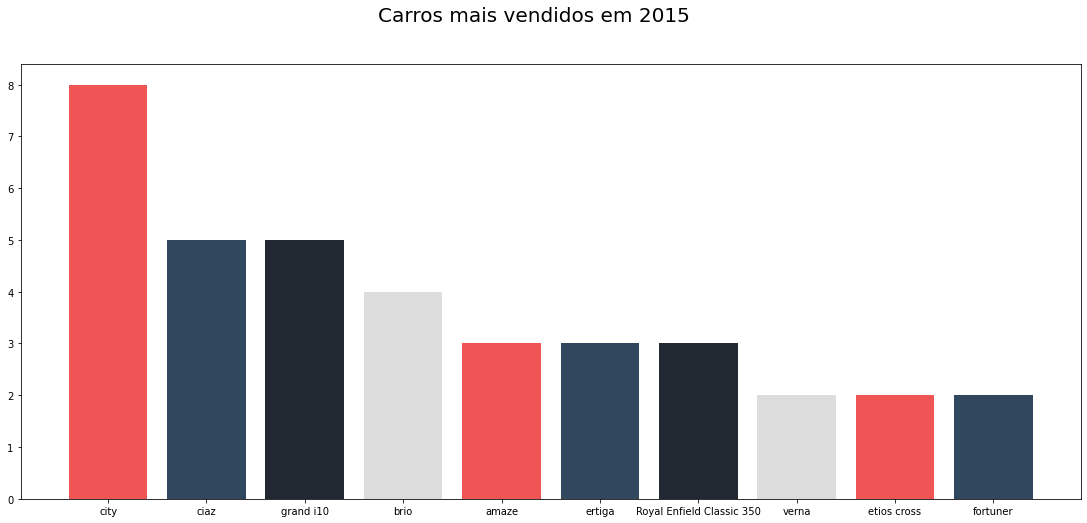

In [70]:
#Criando a figura para visualização
plt.figure(figsize=[19,8])

#Título
plt.suptitle("Carros mais vendidos em 2015", size=20)

#Plotando o gráfico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [72]:
df_bar.head(10)

,Selling_Price
Car_Name,
city,8
ciaz,5
grand i10,5
brio,4
amaze,3
ertiga,3
Royal Enfield Classic 350,3
verna,2
etios cross,2


👉 No geral o carro mais vendido foi o city, seguido do ciaz, grand i10, brio e assim por diante.

👉 O city representa 22% das vendas totais

👉 67% do total das vendas pertence aos top 5 carros

👉 O ano de 2015 tem uma visão similar ao geral dos outros anos

## 4.2) Categorica 🚗

* #### Tipo de combustível

In [81]:
#Criando um dataframe de contagem dos combustíveis
df_bar = df[['Fuel_Type','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Fuel_Type').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 3 artists>

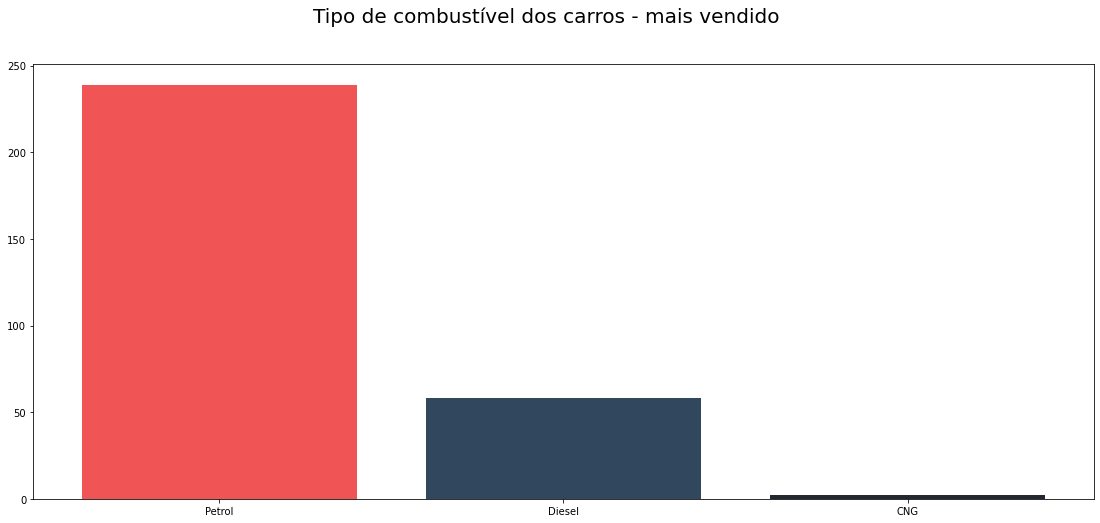

In [82]:
#Criando a figura para visualização
plt.figure(figsize=[19,8])

#Título
plt.suptitle("Tipo de combustível dos carros - mais vendido", size=20)

#Plotando o gráfico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [83]:
df_bar.head()

,Selling_Price
Fuel_Type,
Petrol,239
Diesel,58
CNG,2


👉 Os carros mais vendidos são aqueles com combustível derivados do petróleo, no caso gasolina, em sua esmagadora maioria (80%)

👉 Em seguida diesel (19.4%) e CNG (Gás natural) (0.6%)

* #### Transmissão do carro

In [78]:
#Criando um dataframe de contagem da transmissão
df_bar = df[['Transmission','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Transmission').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 2 artists>

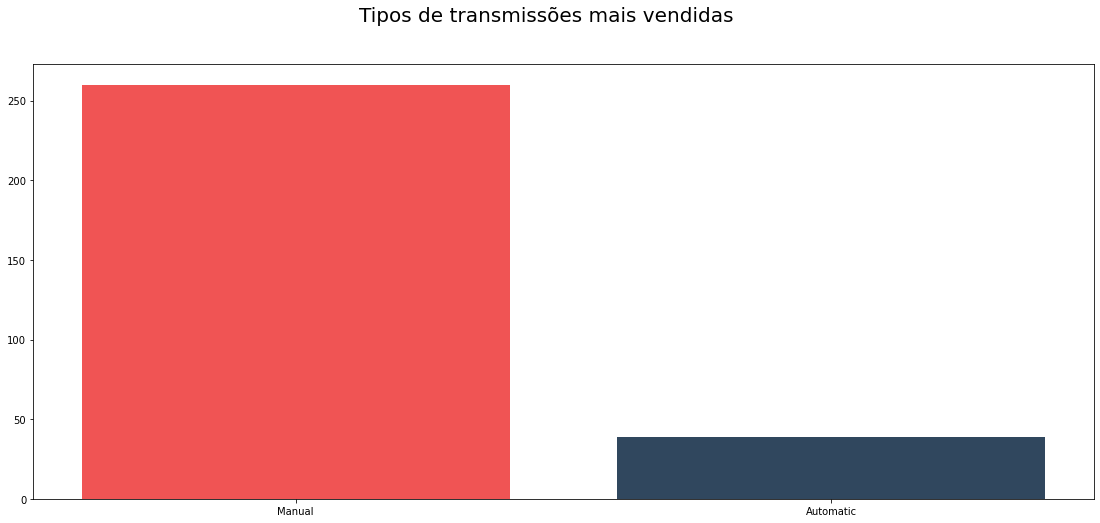

In [79]:
#Criando a figura para visualização
plt.figure(figsize=[19,8])

#Título
plt.suptitle("Tipos de transmissões mais vendidas", size=20)

#Plotando o gráfico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [80]:
df_bar.head()

,Selling_Price
Transmission,
Manual,260
Automatic,39


👉 Na esmagadora maioria os carros do tipo manual são os mais vendidos (89%), seguidos dos automáticos (11%)

* #### Tipos de Vendedores:

In [85]:
#Criando um dataframe de contagem dos vendedores
df_bar = df[['Seller_Type','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Seller_Type').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 2 artists>

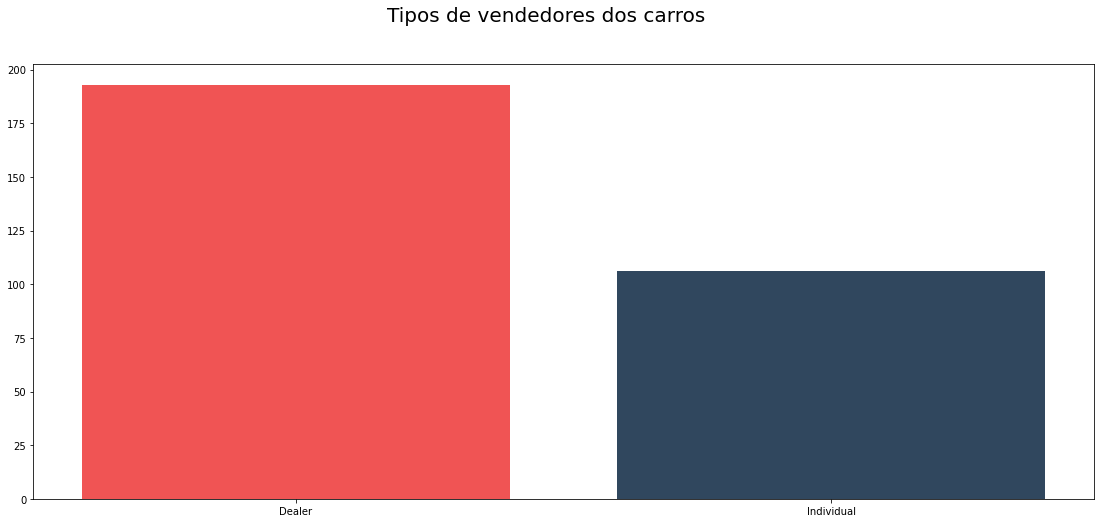

In [86]:
#Criando a figura para visualização
plt.figure(figsize=[19,8])

#Título
plt.suptitle("Tipos de vendedores dos carros", size=20)

#Plotando o gráfico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [87]:
df_bar.head()

,Selling_Price
Seller_Type,
Dealer,193
Individual,106


👉 64% das pessoas compram pelas distribuidoras e 36% com pessoas físicas

* #### Número de donos

In [88]:
#Criando um dataframe de contagem dos donos
df_bar = df[['Owner','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Owner').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 3 artists>

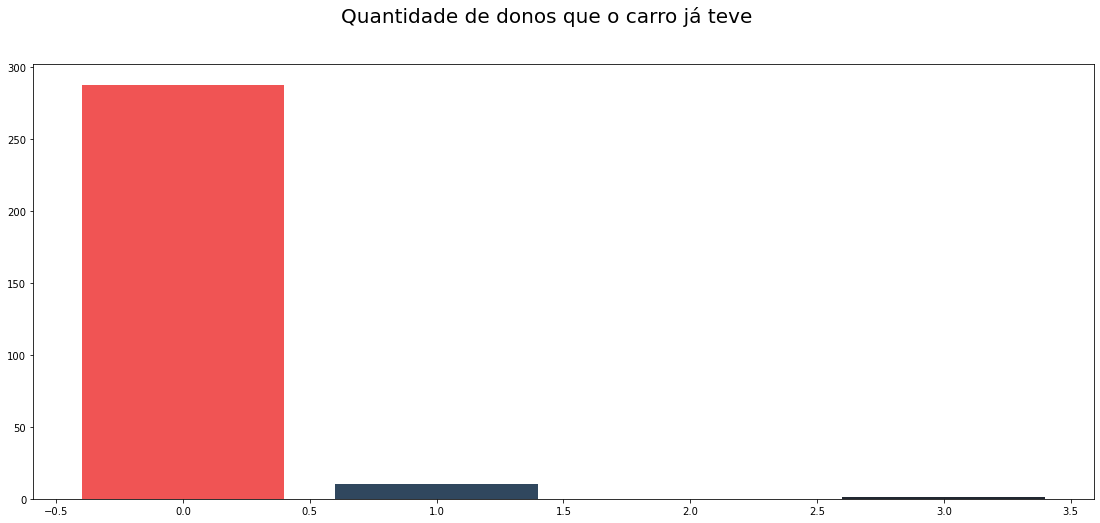

In [89]:
#Criando a figura para visualização
plt.figure(figsize=[19,8])

#Título
plt.suptitle("Quantidade de donos que o carro já teve", size=20)

#Plotando o gráfico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [90]:
df_bar.head()

,Selling_Price
Owner,
0,288
1,10
3,1


👉 96% das pessoas compraram carros 0km ou novos, sem nenhum dono prévio

👉 os 4% compraram carros com pelo menos mais de 1 dono

## 5) Preparando o dataset para o modelo 🔧

* #### Deletando a coluna Ano

In [429]:
df.drop(['Year'], axis=1 , inplace=True)

* #### Alterando a ordem das colunas

In [430]:
# To change columns orders
df = df.reindex(columns=['Car_Name','Kms_Driven', 'Fuel_Type','Seller_Type','Transmission', 'Owner', 'Car_Age',
                         'Present_Price', 'Selling_Price'])

df

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Present_Price,Selling_Price
0,ritz,27000,Petrol,Dealer,Manual,0,5,5.59,3.35
1,sx4,43000,Diesel,Dealer,Manual,0,6,9.54,4.75
2,ciaz,6900,Petrol,Dealer,Manual,0,2,9.85,7.25
3,wagon r,5200,Petrol,Dealer,Manual,0,8,4.15,2.85
4,swift,42450,Diesel,Dealer,Manual,0,5,6.87,4.60
...,...,...,...,...,...,...,...,...,...
294,city,33988,Diesel,Dealer,Manual,0,3,11.60,9.50
295,brio,60000,Petrol,Dealer,Manual,0,4,5.90,4.00
296,city,87934,Petrol,Dealer,Manual,0,10,11.00,3.35
297,city,9000,Diesel,Dealer,Manual,0,2,12.50,11.50


* #### Alterando as variáveis categóricas para númericas

Feature Engineering simples

In [431]:
#converting the categorical to numeric
df["Fuel_Type"] = df["Fuel_Type"].map({"Petrol": 1, "Diesel": 2, "CNG": 3})
df["Seller_Type"] = df["Seller_Type"].map({"Dealer": 1, "Individual": 2})
df["Transmission"] = df["Transmission"].map({"Manual": 1, "Automatic": 2})
df.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Present_Price,Selling_Price
0,ritz,27000,1,1,1,0,5,5.59,3.35
1,sx4,43000,2,1,1,0,6,9.54,4.75
2,ciaz,6900,1,1,1,0,2,9.85,7.25
3,wagon r,5200,1,1,1,0,8,4.15,2.85
4,swift,42450,2,1,1,0,5,6.87,4.60


* #### Deletando o nome do carro

In [432]:
df.drop(['Car_Name'], axis=1 , inplace=True)
df.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Present_Price,Selling_Price
0,27000,1,1,1,0,5,5.59,3.35
1,43000,2,1,1,0,6,9.54,4.75
2,6900,1,1,1,0,2,9.85,7.25
3,5200,1,1,1,0,8,4.15,2.85
4,42450,2,1,1,0,5,6.87,4.60


In [327]:
df.to_csv('C:/Users/lucas/Downloads/cardata_ML.csv')

## 6) Análise de correlação 📈

<AxesSubplot:>

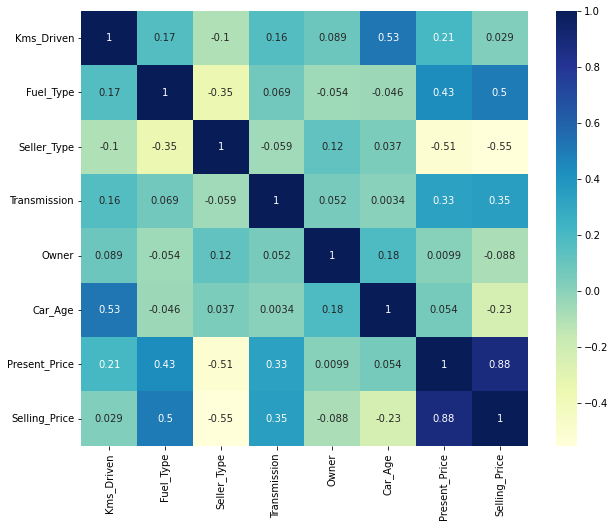

In [17]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

👉 A maior correlação está entre as variáveis Present_Price e Selling_Price (0.88), uma vez que ambas tratam de preço

👉 Há correlações significativas como Car_Age e KMS_Driven, porém o restante está muito baixo

👉 Para a construção de um modelo de regressão linear, será do tipo múltiplo uma vez que há mais de uma feature que influencia o valor da variável target

## 7) Criação e avaliação dos modelos 🤖

## 7.1) Separando os dados 

In [433]:
X = pd.DataFrame(df, columns = ['Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
                                'Car_Age', 'Present_Price'])

y = df['Selling_Price'].values.reshape(-1, 1)

Separando em 80% treino e 20% teste

In [434]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [435]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("df:", df.shape)

X_train: (239, 7)
X_test: (60, 7)
y_train: (239, 1)
y_test: (60, 1)
df: (299, 8)


## 7.2) Modelo Lazy

👉 O objetivo do estudo é prever o preço de venda dos carros, porém há diversos algoritmos supervisionados de machine learning para se utilizar na previsão dos dados. 

👉 A biblioteca LazyRegressor do python pode ser útil na escolha do modelo. Esta biblioteca oferece uma abordagem simplificada para a criação de modelos de machine learning. Ao invés de selecionar manualmente um modelo e ajustar seus parâmetros, o LazyRegressor treina vários modelos de regressão com seus hiperparâmetros padrão e seleciona automaticamente o modelo que obteve o melhor desempenho para o conjunto de dados fornecido. 

👉 Com isso já é possível ter uma noção inicial de qual modelo pode performar melhor com os hiperparâmetros padrões, ficando fácil de escolher os melhores e depois ajustar cada um dos parâmetros para obter uma pontuação ainda melhor e mais específica.

In [144]:
from lazypredict.Supervised import LazyRegressor

In [145]:
# criar modelo LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# ver os resultados
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 28.66it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.97       0.97  0.70        0.04
RandomForestRegressor                        0.95       0.96  0.83        0.16
XGBRegressor                                 0.95       0.96  0.87        0.05
DecisionTreeRegressor                        0.93       0.94  1.02        0.02
AdaBoostRegressor                            0.93       0.94  1.03        0.08
BaggingRegressor                             0.92       0.93  1.09        0.05
KNeighborsRegressor                          0.90       0.92  1.22        0.02
MLPRegressor                                 0.88       0.89  1.37        0.19
ExtraTreesRegressor                          0.84       0.86  1.57        0.11
HistGradientBoostingRegressor                0.83       0.85  1.60        0.17
LGBMRegressor                                0.83   

👉 Então apenas com os hiperparâmetros padrões já é possível observar que o GradientBoosting possui uma reta ajustada quase que perfeita (R² = 0.97), porém não podemos adotar essas informações como verdades absolutas. Primeiro que os hiperparâmetros estão setados no default, segundo que o modelo pode ter obtido um R² alto por conta de overfitting. Por isso há necessidade de investigar alguns desses algoritmos e testar com os dados de teste

👉 Porém o LazyRegressor não deixou de ser útil para obter um "Norte" de qual caminho deve-se seguir.

👉 Para trabalhar com cada algoritmo que realiza cálculos de forma diferentes, irei abordar os modelos de: GradientBoostingRegressor, RandomForestRegressor, KNeighborsRegressor, LinearRegression (Normal, Lasso e Ridge).

## 7.3) Regressão Linear - Statsmodel

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Adicionando constantes a variável X
Xc = sm.add_constant(X)

#Criando o modelo de Regressão Linear OLS com o statsmodel usando y e Xc
modelo = sm.OLS(y, Xc)

#Treinando o modelo
modelo_v1 = modelo.fit()

In [35]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     293.7
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          6.93e-128
Time:                        10:32:09   Log-Likelihood:                -591.94
No. Observations:                 299   AIC:                             1200.
Df Residuals:                     291   BIC:                             1229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9497      0.666      2.927      0.004       0.639       3.261
Kms_Driven     -6.07e-06   3.24e-06     -1.871      0.062   -1.25e-05    3.16e-07
Fuel_Type         1.4567      0.279      5.226      0.000       0.908       2.005
Seller_Type      -1.1326      0.258     -4.386      0.000      -1.641      -0.624
Transmission      1.3349      0.332      4.025      0.000       0.682       1.988
Owner            -0.6639      0.425     -1.561      0.120      -1.501       0.173
Car_Age          -0.4038      0.043     -9.371      0.000      -0.489      -0.319
Present_Price     0.4420      0.016     27.800      0.000       0.411       0.473
==============================================================================
Omnibus:                       99.141   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.812
Skew:                           1.106   Prob(JB):                    2.85e-175
Kurtosis:                      10.722   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pelo statsmodel temos os seguintes parâmetros:

👉 R² = 0.876 (Muito Alto!)

👉 Pelo p-valor, temos que as features: Kms_Driven, Owner não explicam bem o modelo (ambas com p-valor >=0.05)

## 7.4) Regressão Linear - SKLearn

* #### Treinando o modelo

In [146]:
from sklearn.linear_model import LinearRegression

#Criando o modelo
modelo_v2 = LinearRegression()
#Treinando
modelo_v2.fit(X_train, y_train)

LinearRegression()

* #### Coeficientes

In [147]:
#Coeficiente linear (intercepto):
print(modelo_v2.intercept_)

#Coeficiente Angular:
print(modelo_v2.coef_)

[2.08971731]
[[-1.93652561e-05  1.60933360e+00 -1.40046729e+00  1.36562710e+00
  -9.22582616e-01 -3.10446939e-01  4.45006376e-01]]


Equação linear do modelo:

#### y = -1.93652561e-05*x1 + 1.60933360e+00*x2 -1.40046729e+00*x3  + 1.36562710e+00*x4 -9.22582616e-01*x5 -3.10446939e-01*x6 + 4.45006376e-01*x6 + 2.08971731

* #### Previsão

In [148]:
y_pred = modelo_v2.predict(X_test)

* #### Métricas

In [149]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1.3135565633815836
Mean Squared Error:  4.422233984693793
Root Mean Squared Error:  2.1029108361254387
R2 Score:  0.7471833417702042


👉 O valor de R² foi de 0.7471, aproximando para 0.75, sendo assim o mesmo valor que o LazyRegressor previu, uma vez que o modelo de regressão linear construído foi utilizando os hiperparâmetros setados no default. 

👉 É possível aperfeiçoar este modelo de Regressão Linear

* #### Previsão x Real

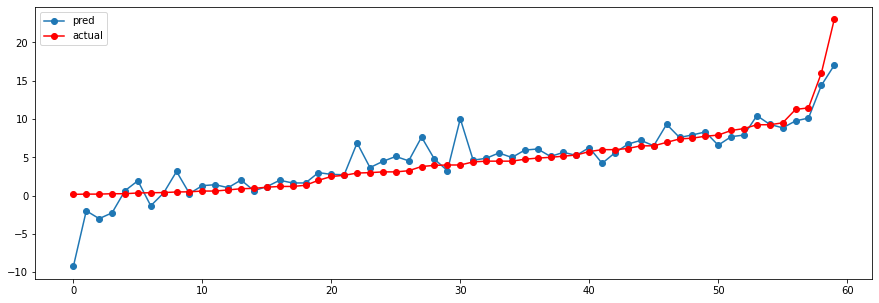

In [150]:
#Criando um dataframe com os valores previstos e os de testes
preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})

#Ordenando os valores do y teste dos menores aos maiores
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

#Tamanho da figura
plt.figure(figsize=(15, 5))

#Plot do y previsto
plt.plot(preds['y_pred'], label='pred', marker='o')
#Plot do y teste
plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
#Legendas
plt.legend()
plt.show()

👉 Pelo gráfico fica mais claro a diferença entre os pontos previstos e os de teste. A ideia é diminuir o erro residual entre cada um dos pontos de forma que fiquem bem próximos

* #### Função Automatizada

Como irei testar diversos parâmetros para o modelo de Regressão Linear, vou automatizar uma função que já calcula o novo modelo e devolve as métricas e o gráfico de pontos

In [227]:
def modelo_regressor(df_novo,regressor):
    
    
#1) Criando os dados X e y

    X = pd.DataFrame(df_novo, columns = ['Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
                                'Car_Age', 'Present_Price'])

    y = df_novo['Selling_Price'].values.reshape(-1, 1)
    
#2) Separando em treino e teste

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
#3) Imprimindo o shape

    print('========================================== Tamanho dos dados ===========================================')
    print("x_train", X_train.shape)
    print("x_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)
    

#4) Treinando o modelo
    regressor.fit(X_train, y_train)
    
#5) Imprimindo coeficientes
    print('====================================== Coeficientes =======================================================')
    
    print('Coeficiente Linear:', regressor.intercept_)
    #Slope:
    print('Coeficientes Angulares:',regressor.coef_)
    
# 6) Prevendo os dados

    y_pred = regressor.predict(X_test)
    
# 7) Métricas

    print('======================================= Métricas =========================================================')
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
    print('R² Score: ', r2_score(y_test, y_pred))
    
# 8) Plot 

    print('============================================= y_test x y_pred ============================================')
    
    preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})
    preds = preds.sort_values(by='y_test')
    preds = preds.reset_index()
    
    plt.figure(figsize=(15, 5))
    plt.plot(preds['y_pred'], label='pred', marker='o')
    plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
    plt.legend()
    plt.show()

### 7.4.1) Regressão Ridge

👉 O objetivo da regressão Ridge e da Lasso é lidar com o problema de overfitting (sobreajuste) em modelos de regressão linear. O overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar bem para novos dados de teste.

👉 Ambas irão adicionar uma penalização para cada uma das features do modelo. Na Ridge, a penalização é proporcional ao quadrado da magnitude dos coeficientes, enquanto na Lasso, a penalização é proporcional à magnitude absoluta dos coeficientes

* #### Função que calcula o RMSE

In [166]:
# Função para calcular o RMSE
def rmse_cv(modelo):
    rmse = np.sqrt(-cross_val_score(modelo, 
                                    X_train, 
                                    y_train, 
                                    scoring = "neg_mean_squared_error", 
                                    cv = 5))
    return(rmse)

* #### Importando a função Ridge

In [153]:
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
modelo_ridge = Ridge()

* #### Testando valores de alpha para o modelo Ridge

In [154]:
# Valores de alpha para testar com o modelo Ridge
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

Text(0, 0.5, 'RMSE')

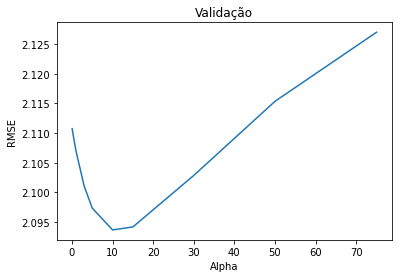

In [155]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validação")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

👉 Alpha = 10 possui o menor erro RMSE, performando assim melhor

* #### Comparando o R² do modelo de regressão linear normal x Regressão Ridge

In [157]:
modelo_ridge_max = Ridge(alpha = 10)

In [158]:
modelo_ridge_max.fit(X_train, y_train)

Ridge(alpha=10)

In [159]:
from sklearn.metrics import r2_score

# Avalia o desempenho do modelo de regressão linear no conjunto de teste
y_pred_lr = modelo_v2.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print('R2 do modelo de regressão linear:', r2_lr)

# Avalia o desempenho do modelo de regressão Ridge no conjunto de teste
y_pred_ridge = modelo_ridge_max.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('R2 do modelo de regressão Ridge:', r2_lasso)

R2 do modelo de regressão linear: 0.7471833417702042
R2 do modelo de regressão Ridge: 0.7623022232875761


* #### Testando o modelo de Regressão Ridge

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
====================================== Coeficientes =======================================================
Coeficiente Linear: [2.64180622]
Coeficientes Angulares: [[-1.74863213e-05  1.23446265e+00 -1.14026466e+00  8.47244043e-01
  -5.98062779e-01 -3.31149606e-01  4.64423282e-01]]
======================================= Métricas =========================================================
Mean Absolute Error:  1.250787499225773
Mean Squared Error:  4.1577766023170755
Root Mean Squared Error:  2.0390626773880873
R² Score:  0.7623022232875761
============================================= y_test x y_pred ============================================


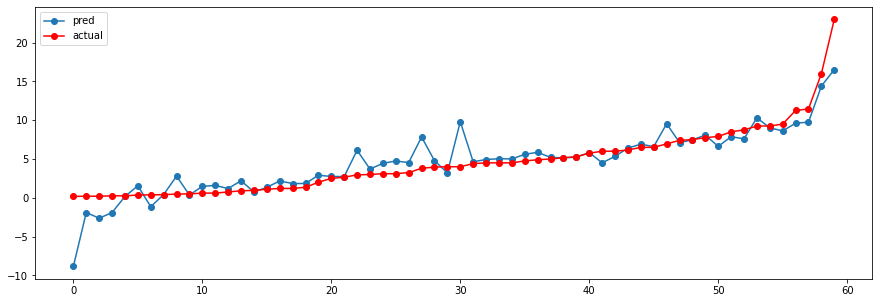

In [228]:
modelo_regressor(df,modelo_ridge_max)

👉 A regressão Ridge (com alpha = 10) já apresentou um R² maior que o modelo de regressão linear simples e ainda se livrou dos problemas de overfitting 

## 7.4.2) Regressão Lasso

* #### Importando a função Lasso

In [170]:
from sklearn.linear_model import Lasso

* #### Criando o modelo Lasso

In [171]:
modelo_lasso = Lasso()

In [175]:
modelo_lasso.fit(X_train,y_train)

Lasso()

* #### Testando valores de alpha para o modelo Lasso

Text(0, 0.5, 'RMSE')

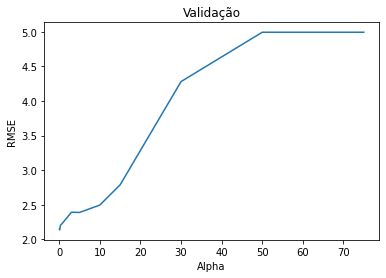

In [177]:
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validação")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

* #### Comparando o R² da regressão Linear com a Lasso

In [189]:
modelo_lasso_max = Lasso(alpha=0)

In [192]:
modelo_lasso_max.fit(X_train,y_train)

Lasso(alpha=0)

In [194]:
# Avalia o desempenho do modelo de regressão linear no conjunto de teste
y_pred_lr = modelo_v2.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print('R2 do modelo de regressão linear:', r2_lr)

# Avalia o desempenho do modelo de regressão LASSO no conjunto de teste
y_pred_lasso = modelo_lasso_max.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print('R2 do modelo de regressão LASSO:', r2_lasso)

R2 do modelo de regressão linear: 0.7471833417702042
R2 do modelo de regressão LASSO: 0.7471833417701942


👉 No caso a Regressão Lasso teve um R² idêntico à regressão normal! Então será descartado

👉 Seguiremos com o melhor modelo de Regressão Linear: Modelo Ridge com alpha = 10.

## 7.4.3) Aperfeiçoando a Regressão Ridge com CV

👉 O cross_val_score é uma função do scikit-learn que realiza validação cruzada e retorna o erro médio do modelo em cada iteração da validação cruzada.

👉 A técnica de CV Score consiste em dividir o conjunto de dados em partes chamadas folds, e em seguida treinar o modelo em cada fold e avaliá-lo em um fold diferente. Isso é repetido várias vezes até que todos os folds tenham sido usados para treinamento e avaliação.

* #### Importando o Cross_val_Score e o KFold

In [196]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

* #### Avaliando o Cross Validation

In [197]:
print('<============ Cross validation ================>')

# Folds para divisão do dataset
KF = 10
kfold_validation = KFold(KF)

# Encontrando o Erro médio quadrado do modelo Ridge
results = cross_val_score (modelo_ridge_max, X , y , cv = kfold_validation)
print(results)
print(np.mean(results))

<============ Cross validation ================>
[ 7.58919197e-01  8.82128721e-01  7.24352705e-01  8.22867440e-01
 -6.03775975e+01 -7.40667217e+02  2.66356192e-01  7.84211996e-01
  8.42888139e-01  8.67000982e-01]
-79.5096089488914


👉 Os piores resultados estão nos folds 5 e 6

In [203]:
#Folds totais
KF = 10

# F = folds para deletar
F = 5, 6
A = round (len(df)/KF)

# Deletando os folds 5 e 6 (índice de 120 à 180 será deletado, cada fold = 30 linhas)
df_fold_new = df[~((df.index > 120) & (df.index <= 180))]
df_fold_new.reset_index(drop=True, inplace=True)
df_fold_new

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Present_Price,Selling_Price
0,27000,1,1,1,0,5,5.59,3.35
1,43000,2,1,1,0,6,9.54,4.75
2,6900,1,1,1,0,2,9.85,7.25
3,5200,1,1,1,0,8,4.15,2.85
4,42450,2,1,1,0,5,6.87,4.60
...,...,...,...,...,...,...,...,...
234,33988,2,1,1,0,3,11.60,9.50
235,60000,1,1,1,0,4,5.90,4.00
236,87934,1,1,1,0,10,11.00,3.35
237,9000,2,1,1,0,2,12.50,11.50


In [206]:
df_fold_new.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Present_Price,Selling_Price
0,27000,1,1,1,0,5,5.59,3.35
1,43000,2,1,1,0,6,9.54,4.75
2,6900,1,1,1,0,2,9.85,7.25
3,5200,1,1,1,0,8,4.15,2.85
4,42450,2,1,1,0,5,6.87,4.60


* #### Testando a função com o novo dataset

Utilizando o dataset sem os folds 5 e 6 no modelo de Regressão Ridge

========================================== Tamanho dos dados ===========================================
x_train (191, 7)
x_test (48, 7)
y_train (191, 1)
y_test (48, 1)
====================================== Coeficientes =======================================================
Coeficiente Linear: [2.3206261]
Coeficientes Angulares: [[-4.48829671e-06  1.01775739e+00 -3.40341565e-01  1.14896784e+00
  -6.66701884e-01 -4.81253881e-01  4.29263500e-01]]
======================================= Métricas =========================================================
Mean Absolute Error:  1.3413185528266849
Mean Squared Error:  4.979133026637222
Root Mean Squared Error:  2.231397101960389
R² Score:  0.8175198386580038
============================================= y_test x y_pred ============================================


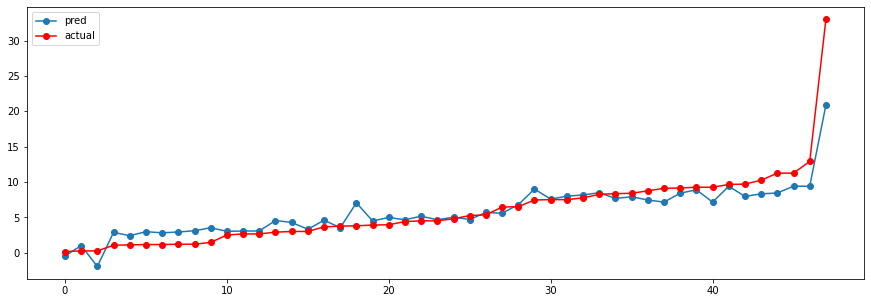

In [229]:
modelo_regressor(df_fold_new,modelo_ridge_max)

In [332]:
df_fold_new.to_csv('C:/Users/lucas/Downloads/cardata_KFold.csv')

👉 O modelo de Regressão Ridge (alpha = 10) passado pelo CV Score (retirado o folder 5 e 6) apresentou um R² de 0.81, possuindo a melhor pontuação até o momento.

## 7.5) Modelo KNNRegressor

👉 O KNN Regressor determina o valor de um ponto de dados de teste calculando a média dos valores dos K pontos mais próximos (vizinhos) do conjunto de treinamento. A distância entre os pontos de dados é medida utilizando uma métrica de distância.

👉 O número de vizinhos K é um hiperparâmetro que deve ser definido pelo usuário. Quando K é pequeno, o modelo pode sofrer de overfitting, enquanto que quando K é grande, o modelo pode sofrer de underfitting.

👉 O algoritmo KNN Regressor encontra os K pontos de dados mais próximos ao ponto de teste, calcula a média dos valores dos vizinhos mais próximos e utiliza esse valor como a predição para o ponto de teste.

* #### Padronizando a escala dos dados

In [535]:
from sklearn.preprocessing import StandardScaler

#Instanciando o StandardScaler
scaler = StandardScaler()

#Padronizando os dados de treino da variável X
scaler.fit(X_train)

#Transformando X e y
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

* #### Encontrando o melhor K para o modelo KNN

In [536]:
error = []

In [537]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for i in range(1, 60):
    
    #Criando o modelo KNN com k=i
    modelo_KNN = KNeighborsRegressor(n_neighbors=i)
    
    #Treinando o modelo com os dados de treino X e y
    modelo_KNN.fit(X_train, y_train)
    
    #Prevendo os valores utilizando os dados de X de teste
    pred_i = modelo_KNN.predict(X_test)
    
    #Comparando as previsões geradas pelo modelo com o y_teste
    mae = mean_absolute_error(y_test, pred_i)
    
    #Adicionando o valor do erro na lista de erros
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

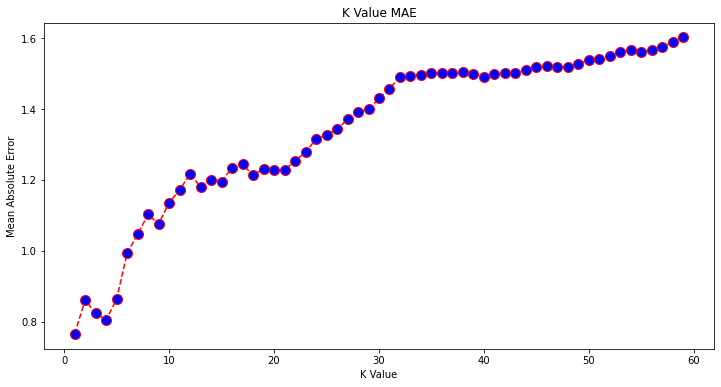

In [538]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

👉 O valor do K que apresenta o menor erro absoluto possível é o K=1, porém escolhi o K=5

👉 Já que valores de K muito pequenos podem ser responsáveis de underfitting e valores de K muito alto overfitting

* #### Criando o modelo KNN com o melhor K

In [539]:
from sklearn.neighbors import KNeighborsRegressor

modeloKNN = KNeighborsRegressor(n_neighbors=5)

In [540]:
modeloKNN.fit(X_train,y_train)

KNeighborsRegressor()

* #### Prevendo os dados

In [541]:
y_pred = modeloKNN.predict(X_test)

* #### Métricas

In [542]:
print('======================================= Métricas =========================================================')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
print('R² Score: ', r2_score(y_test, y_pred))

======================================= Métricas =========================================================
Mean Absolute Error:  0.8635333333333333
Mean Squared Error:  1.4827854666666664
Root Mean Squared Error:  1.2176967876555584
R² Score:  0.9152299792702325


* #### Comparando y_previsto x y_teste

============================================= y_test x y_pred ============================================


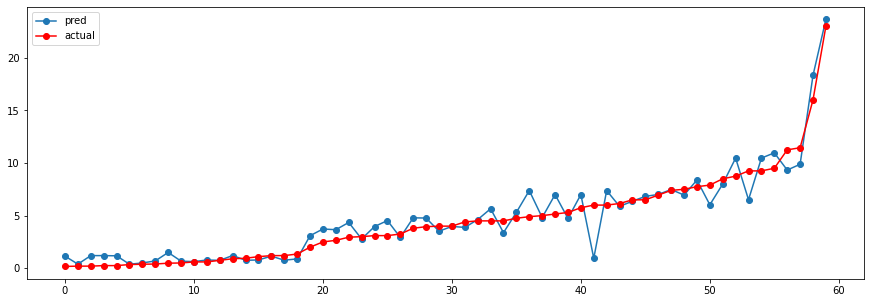

In [543]:
    print('============================================= y_test x y_pred ============================================')
    
    preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})
    preds = preds.sort_values(by='y_test')
    preds = preds.reset_index()
    
    plt.figure(figsize=(15, 5))
    plt.plot(preds['y_pred'], label='pred', marker='o')
    plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
    plt.legend()
    plt.show()

👉 O modelo KNN com n=5 possui um R² de 0.92 

## 7.6) RandomForest Regressor

👉 Random Forest é um algoritmo de aprendizado de máquina que utiliza um conjunto de várias árvores de decisão para realizar a regressão dos dados. 

👉 Cada árvore na floresta é construída a partir de uma amostra aleatória do conjunto de dados de treino e uma seleção aleatória de features para cada nó de divisão. 

👉 O resultado final é a média das previsões de todas as árvores na floresta, o que pode levar a um modelo mais preciso e menos sensível a overfitting do que uma única árvore de decisão.

In [436]:
from sklearn.ensemble import RandomForestRegressor

* #### Criando a função Forest

In [437]:
def modelo_forest(df_novo,regressor):
    
    
#1) Criando os dados X e y

    X = pd.DataFrame(df_novo, columns = ['Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
                                'Car_Age', 'Present_Price'])

    y = df_novo['Selling_Price'].values.reshape(-1, 1)
    
#2) Separando em treino e teste

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
#3) Imprimindo o shape

    print('========================================== Tamanho dos dados ===========================================')
    print("x_train", X_train.shape)
    print("x_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)
    

#4) Treinando o modelo
    regressor.fit(X_train, y_train)
    
#5) Prevendo os dados

    y_pred = regressor.predict(X_test)
    
#6) Métricas

    print('======================================= Métricas =========================================================')
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
    print('R² Score: ', r2_score(y_test, y_pred))
    
#7) Plot 

    print('============================================= y_test x y_pred ============================================')
    
    preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})
    preds = preds.sort_values(by='y_test')
    preds = preds.reset_index()
    
    plt.figure(figsize=(15, 5))
    plt.plot(preds['y_pred'], label='pred', marker='o')
    plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
    plt.legend()
    plt.show()

* #### Criando o modelo de RandomForestRegressor v1

In [438]:
rf_v1 = RandomForestRegressor()

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= Métricas =========================================================
Mean Absolute Error:  0.5164366666666669
Mean Squared Error:  0.6614225740000008
Root Mean Squared Error:  0.8132789029601105
R² Score:  0.9621868391823666
============================================= y_test x y_pred ============================================


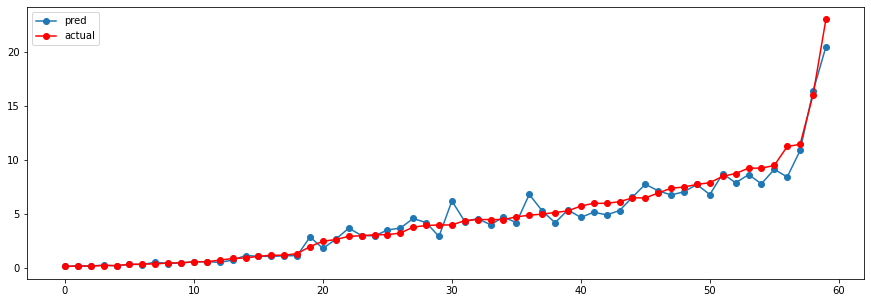

In [439]:
modelo_forest(df,rf_v1)

👉 O modelo de RandomForest com os hiperparâmetros setados no default apresentaram um R² de 0.96 (assim como dado pelo LazyRegressor).

👉 Porém é necessário conferir outros hiperparâmetros e realizar um cross validation para conferir se não houve overfitting dos dados.

* #### RandomizedSearch

In [443]:
from sklearn.model_selection import RandomizedSearchCV

* #### Parâmetros escolhidos

In [444]:
param_dist = {"max_depth": [1, 3, 12, None],
              "max_features": [1, 8, 10, 22],
              "n_estimators": [50,100,250]
             }

In [445]:
rsearch = RandomizedSearchCV(rf_v1, 
                             param_distributions = param_dist, 
                             n_iter = 6, #poucas iterações se não fica pesado
                             return_train_score = True
                            )  

* #### Treinando o modelo de obtendo os melhores parâmetros

In [446]:
rsearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=6,
                   param_distributions={'max_depth': [1, 3, 12, None],
                                        'max_features': [1, 8, 10, 22],
                                        'n_estimators': [50, 100, 250]},
                   return_train_score=True)

In [447]:
bestrg = rsearch.best_estimator_
print (bestrg)

RandomForestRegressor(max_depth=3, max_features=1, n_estimators=50)


* #### Criando o modelo com os novos parâmeros

In [472]:
rf_v2 = RandomForestRegressor(max_depth=3, max_features=1, n_estimators=50)

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= Métricas =========================================================
Mean Absolute Error:  1.6802919196767454
Mean Squared Error:  4.686701162583114
Root Mean Squared Error:  2.1648790180014945
R² Score:  0.7320639002488227
============================================= y_test x y_pred ============================================


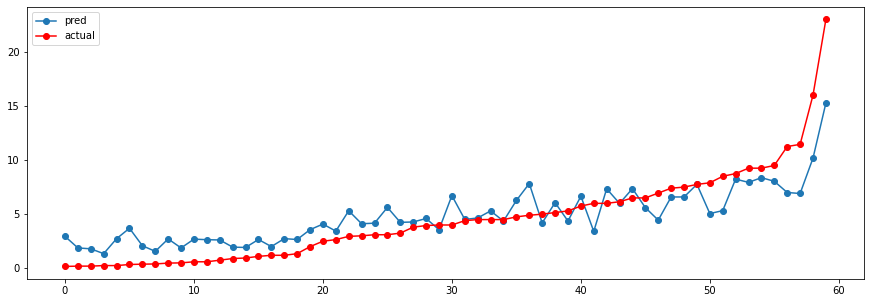

In [473]:
modelo_forest(df,rf_v2)

👉 Os hiperparâmetros encontrados pelo RandomizedSearch não foram ideais. Talvez testar mais parâmetros possa trazer métricas com bons resultados, porém consome muito tempo de iteração

* #### GridSearch

In [454]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [1, 3, 12, None],
              "max_features": [1, 8, 10, 22],
              "n_estimators": [50,100,250]
             }

In [455]:
grid_search = GridSearchCV(rf_v1, param_grid = param_grid, return_train_score = True)

In [457]:
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 12, None],
                         'max_features': [1, 8, 10, 22],
                         'n_estimators': [50, 100, 250]},
             return_train_score=True)

In [458]:
bestrf_gs = grid_search.best_estimator_
print (bestrf_gs)

RandomForestRegressor(max_features=1, n_estimators=50)


In [467]:
rf_v3 = RandomForestRegressor(max_features=1, n_estimators=50)

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= Métricas =========================================================
Mean Absolute Error:  0.8159866666666666
Mean Squared Error:  1.7132276146666656
Root Mean Squared Error:  1.308903210580013
R² Score:  0.9020557297903761
============================================= y_test x y_pred ============================================


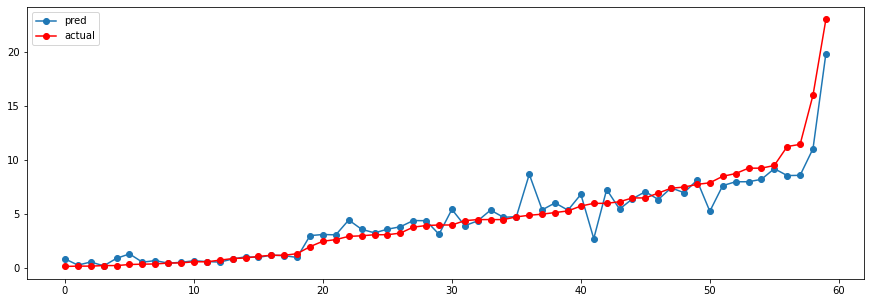

In [476]:
modelo_forest(df,rf_v3)

👉 Os hiperparâmetros do GridSearch foram úteis, porém o modelo de RandomForest no default teve métricas melhores

👉 Então o modelo rf_v1 foi o vencedor

## 7.7) GradientBoostingRegressor 

In [484]:
from sklearn.ensemble import GradientBoostingRegressor

* #### Criando o modelo de GradienteBoosting

In [487]:
est = GradientBoostingRegressor()

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= Métricas =========================================================
Mean Absolute Error:  0.4847975729250516
Mean Squared Error:  0.48230177690990433
Root Mean Squared Error:  0.6944795007125152
R² Score:  0.972427075564366
============================================= y_test x y_pred ============================================


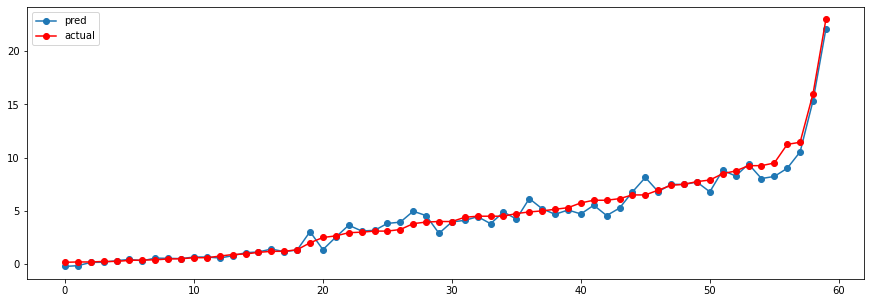

In [488]:
modelo_forest(df,est)

👉 Mais um modelo que se usado os hiperparâmetros padrões possui métricas com ótimas pontuações

* #### GridSearch

In [489]:
param_grid = {"learning_rate": [0.01, 0.1, 1],
              "max_depth": [1, 3, 7],
              "n_estimators": [50,250,1200]
             }

In [492]:
grid_search = GridSearchCV(est, param_grid = param_grid, return_train_score = True)

In [493]:
grid_search.fit(X, y)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 7],
                         'n_estimators': [50, 250, 1200]},
             return_train_score=True)

In [494]:
bestgb_gs = grid_search.best_estimator_
print (bestgb_gs)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1200)


In [495]:
est_v2 = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1200)

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= Métricas =========================================================
Mean Absolute Error:  0.5541678659550551
Mean Squared Error:  0.7939271041635297
Root Mean Squared Error:  0.8910258717700231
R² Score:  0.9546116288628312
============================================= y_test x y_pred ============================================


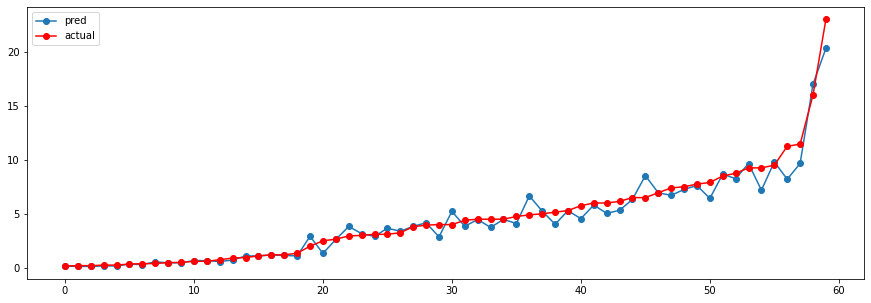

In [496]:
modelo_forest(df,est_v2)

👉 O modelo obteve algumas métricas ligeiramente menores que o modelo padrão

* #### RandomizedSearch

In [497]:
rsearch = RandomizedSearchCV(est, 
                             param_distributions = param_grid, 
                             n_iter = 6, #poucas iterações se não fica pesado
                             return_train_score = True
                            )  

In [498]:
rsearch.fit(X,y)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=6,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [1, 3, 7],
                                        'n_estimators': [50, 250, 1200]},
                   return_train_score=True)

In [499]:
bestgb_rs = grid_search.best_estimator_
print (bestgb_rs)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1200)


========================================== Tamanho dos dados ===========================================
x_train (191, 7)
x_test (48, 7)
y_train (191, 1)
y_test (48, 1)
======================================= Métricas =========================================================
Mean Absolute Error:  0.8639720750358147
Mean Squared Error:  3.2148402905350917
Root Mean Squared Error:  1.7929975712574437
R² Score:  0.8821793730420178
============================================= y_test x y_pred ============================================


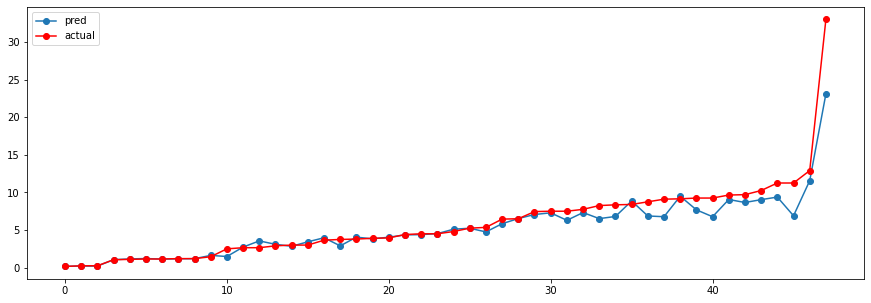

In [501]:
modelo_forest(df_fold_new,est_v2)

👉 Os parâmetros encontrados pelo Randomized foram o mesmo do GridSearch

## 8) Conclusão 🎉

👉 Como demonstrado pelo próprio LazyRegressor, o melhor modelo realmente foi o GradientBoosting com os hiperparâmetros.

* #### Prevendo o preço do carro a partir das outras features

In [506]:
Present_Price = 10.52
Kms_Driven = 38000
Fuel_Type = 1 
Seller_Type = 1
Transmission = 2 #manual
Owner = 1
Car_Age = 4

In [507]:
Model_input = pd.DataFrame({ "Kms_Driven":[Kms_Driven],
                             "Fuel_Type":[Fuel_Type],
                             "Seller_Type":[Seller_Type],
                             "Transmission":[Transmission],
                             "Owner":[Owner],
                             "Car_Age":[Car_Age],
                             "Present_Price":[Present_Price]
                           }
                          )

Model_input.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Present_Price
0,38000,1,1,2,1,4,10.52


### 8.1) Modelo GradientBoostingRegressor

In [510]:
Y_pred = est.predict(Model_input)
print('O preço seria de:', Y_pred)

O preço seria de: [7.32139473]


### 8.2) KNNRegressor

In [544]:
#Instanciando o StandardScaler
scaler = StandardScaler()

#Padronizando os dados de treino da variável X
scaler.fit(Model_input)

#Transformando X e y
Model_input = scaler.transform(Model_input)

In [545]:
Y_pred = modelo_KNN.predict(Model_input)
print('O preço seria de:', Y_pred)

O preço seria de: [[4.97711864]]


### 8.3) RandomForestRegressor

In [513]:
Y_pred = rf_v1.predict(Model_input)
print('O preço seria de:', Y_pred)

O preço seria de: [7.299]


### 8.4) LinearRegression (Ridge - Alpha = 10)

In [514]:
Y_pred = modelo_ridge_max.predict(Model_input)
print('O preço seria de:', Y_pred)

O preço seria de: [[7.04955696]]
